# Imports

In [ ]:
# imports

import os
import numpy as np
import random
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt
from utils import *

# Important NOTE: Use opencv >=4.4 
import cv2

# Import and split data

In [ ]:
# define file directory
directory = '../data/interim/PatternNet/images'

# create a list of all possible classes
all_classes = []
for item in os.listdir(directory):
    item_path = os.path.join(directory, item)
    if os.path.isdir(item_path):
        all_classes.append(item)
#print(all_classes)
        
# create a list of classes considered for this project
classes = ['beach', 'chaparral', 'dense_residential', 'forest', 'freeway', 'harbor', 'overpass', 'parking_space', 'river', 'swimming_pool']
        
# inspect the number of images per class
data = []
for class_name in classes:
    class_dir = os.path.join(directory, class_name)
    image_count = len(os.listdir(class_dir))
    data.append([class_name, image_count])
image_count_df = pd.DataFrame(data, columns=['Class', 'Total Image Count'])
print("The following classes were selected for evaluation:")
display(image_count_df)

# define the train, val, and test sets
train_files, val_files, test_files = generate_splits(classes, directory)

# Inspect examples

In [ ]:
def extract_key_points(img):

    # Converting image to grayscale
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Applying SIFT detector
    sift = cv2.SIFT_create(nfeatures=0, nOctaveLayers=3, edgeThreshold=0, contrastThreshold=0.04)

    kp = sift.detect(gray, None)
    #kp, des = sift.detectAndCompute(gray,None)

    # Marking the keypoint on the image using circles
    sift_img=cv2.drawKeypoints(gray, kp, img,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return sift_img


In [ ]:
# define a function to show a grid of SIFT image in a directory (given a file subset)
def generate_sift(files, directory, images_per_class=3):
    # create a dictionary to store class images
    class_images = {}
    
    # iterate over each file
    for class_name, file_name in files:
        # load the image
        img = plt.imread(os.path.join(directory, class_name, file_name))
        # if class not in dictionary, initialize empty list
        if class_name not in class_images:
            class_images[class_name] = []
        # append image to class list
        class_images[class_name].append(img)

    # create a grid of images
    num_classes = len(class_images)
    fig, axes = plt.subplots(num_classes, images_per_class + 1, figsize=(12, 3*num_classes))
    for i, (class_name, images) in enumerate(class_images.items()):
        # display class name in the first column
        axes[i, 0].text(0.5, 0.5, class_name, fontsize=16, ha='center', va='center')
        axes[i, 0].axis('off')

        # display random images in the subsequent columns
        random.shuffle(images)
        for j in range(images_per_class):
            sift_image = extract_key_points(images[j])
            axes[i, j+1].imshow(sift_image)

    plt.tight_layout()
    plt.show()

In [ ]:
# show a grid with 3 random images per class
generate_sift(train_files, directory, 1)

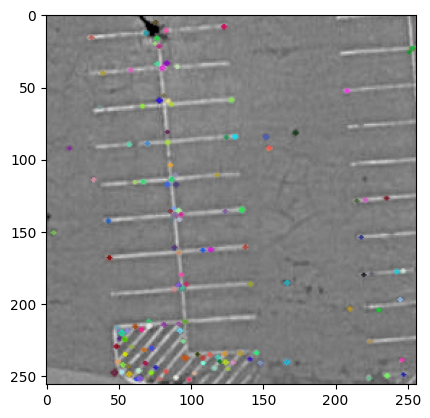

In [42]:
import os
import numpy as np
import random
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt
from utils import *

# Important NOTE: Use opencv >=4.4 
import cv2

sample = '../data/interim/PatternNet/images' + '/' + 'parking_space' + '/' + 'parkingspace005.jpg'

img = plt.imread(sample)

# Converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Applying SIFT detector
sift = cv2.SIFT_create(nfeatures=0, nOctaveLayers=3, edgeThreshold=0.2, contrastThreshold=0.07)

#kp = sift.detect(gray, None)
kp, des = sift.detectAndCompute(gray,None)

# Marking the keypoint on the image using circles
sift_img=cv2.drawKeypoints(gray, kp, img,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(sift_img)

In [43]:
des.shape

(214, 128)

https://kushalvyas.github.io/BOV.html

https://www.vlfeat.org/api/sift.html#sift-tech-descriptor

https://docs.opencv.org/3.4/d7/d60/classcv_1_1SIFT.html

https://machinelearningmastery.com/opencv_sift_surf_orb_keypoints

https://github.com/kushalvyas/Bag-of-Visual-Words-Python/blob/8ddda6ab804f14777855c8f4119f749f61e2da6e/Bag.py#L140